# Colored structures in PyMol
The [pdb_prot_align.pymol_struct](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.pymol_struct.html) module contains functions that make it easy to color structures in [pymol](https://pymol.org/).

This example shows how to color the structure of the CoV Spike, using a measure of alignment variability created by running `pdb_prot_align` in one of the earlier examples.
So we first specify the paths of the PDB file and the `*_sites.csv` file created by `pdb_prot_align`:

In [1]:
pdbfile = 'input_files/6crv.pdb'
sites_csv = 'output_files/beta_coronavirus_Spike_sites.csv'

In this example, [pymol](https://pymol.org/) is run via a Jupyter notebook [as described here](https://pymolwiki.org/index.php/Jupyter).
Note that you could also run the same commands inside [pymol](https://pymol.org/) is run via a Jupyter notebook [as described here](https://pymolwiki.org/index.php/Jupyter) itself if you want things to be more interactive.

All of this requires you to have [pymol](https://pymol.org/) installed, which can be done a variety of ways.
One way (the way used in this notebook) is to install it via [conda](https://docs.conda.io).
The [environment.yml](https://github.com/jbloomlab/pdb_prot_align/blob/master/environment.yml) file in the [pdb_prot_align GitHub repo](https://github.com/jbloomlab/pdb_prot_align) can be used to [create such a conda environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file), although if you're not building from source, you want to change the line in the [environment.yml](https://github.com/jbloomlab/pdb_prot_align/blob/master/environment.yml) reading:

    - pip:
      - -e .
    
to:
    
    - pip:
      - pdb_prot_align
      
Assuming you somehow got [pymol](https://pymol.org/) installed, we now import the necessary Python packages including the `pymol.cmd` API and the [pdb_prot_align.colorschemes](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.colorschemes) and [pdb_prot_align.pymol_struct](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.pymol_struct.html) modules:

In [2]:
import tempfile

from IPython.display import display, Image

import pandas as pd

from pymol import cmd

import pdb_prot_align.colorschemes
import pdb_prot_align.pymol_struct

We are going to color the structure according to the number of effective amino acids, so we get the maximum number at any site to set the color scale limits (note that it would also be reasonable to color by entropy):

In [3]:
max_neff = pd.read_csv(sites_csv)['n_effective'].max()
print(f"Max number of effective amino acids is {max_neff:.2f}")

Max number of effective amino acids is 7.50


Create a [ValueToColorMap](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.colorschemes.html#pdb_prot_align.colorschemes.ValueToColorMap) to map the numerical values to colors:

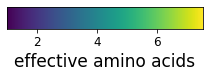

In [4]:
color_map = pdb_prot_align.colorschemes.ValueToColorMap(minvalue=1,
                                                        maxvalue=max_neff,
                                                        cmap='viridis')

_ = color_map.scale_bar(label='effective amino acids', orientation='horizontal')

Now we load the PDB, set the background to white, hide everything except the three chains of interest, and set the view to a nice orientation.
This is all done using standard [pymol](https://pymol.org/) commands:

In [5]:
cmd.load(pdbfile)
cmd.bg_color('white')
cmd.hide('everything')
cmd.show('surface', 'chain A+B+C')
cmd.set_view ([  0.911516845,    0.088619262,   -0.401601136,
                 0.411251098,   -0.188872188,    0.891738057,
                 0.003175047,   -0.977994919,   -0.208603635,
                 0.000000000,    0.000000000, -443.616516113,
               164.800567627,  164.793365479,  167.758102417,
               349.750640869,  537.482421875,  -20.000000000])

 PyMOL not running, entering library mode (experimental)


Next we use [pdb_prot_align.pymol_struct.color_by_site](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.pymol_struct.html#pdb_prot_align.pymol_struct.color_by_site) to color the residues by the number of effective amino acids: 

In [6]:
pdb_prot_align.pymol_struct.color_by_site(cmd=cmd,
                                          sites_df=sites_csv,
                                          color_by=('n_effective', color_map),
                                          )

Now we can save an image to a PNG file using the standard [pymol](https://pymol.org/) command.
Here we save the image to a temporary file and then display it; you could also write it to a named permanent file of course:

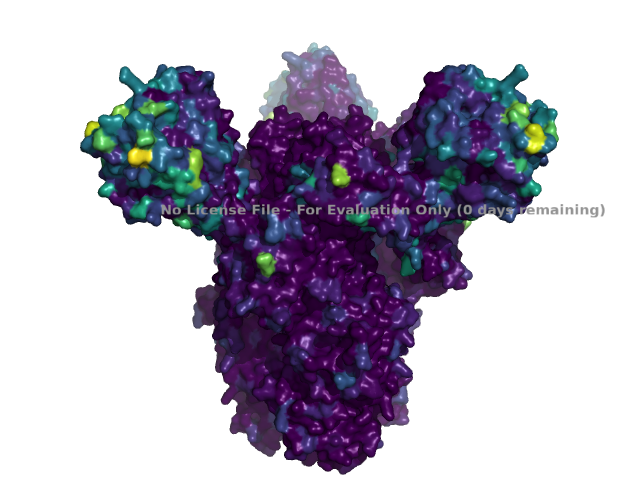

In [7]:
with tempfile.NamedTemporaryFile('w', suffix='.png') as f:
    cmd.png(f.name, ray=1)
    display(Image(f.name))

Note that if you don't have a license file, then there will be watermark on the structure image above indicating the lack of a license.